In [41]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from tabulate import tabulate
import sklearn
import sklearn.ensemble
import sklearn.compose
from sklearn.preprocessing import *
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold


raw_data = pd.read_csv('dataset/VehicleDataset.csv')
display(raw_data)
raw_data.columns = [column.lower().replace("-", "_").replace(" ", "_") for column in raw_data.columns]

df=raw_data.copy()
df.replace('?', np.nan, inplace = True)
display(df)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [42]:
df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [43]:

df.dropna(subset=["price","num_of_doors"],axis=0,inplace=True)
display(df)

def calculate_mean(df, сolumns):
    for index, column in enumerate(сolumns):
        avg_value = df[column].astype("float").mean(axis=0)
        df[column].replace(np.nan, avg_value, inplace=True)
    return df


df = calculate_mean(df, ["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm"])

display(df)


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,121.840491,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,121.840491,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,121.840491,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


#### Replace

In [44]:

def Convert_Type(df, columns, type_):
    for index, column in enumerate(columns):
        df[column] = df[column].astype(type_[index])
    return df

transformed_data = df.copy()

transformed_data = Convert_Type(transformed_data, ["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm", "price"], [int, float, float, int, int, float])

transformed_data['symboling'] = MinMaxScaler().fit_transform(transformed_data['symboling'].values.reshape((-1, 1)))

for object in transformed_data.select_dtypes(include='object').columns:
    transformed_data[object] = LabelEncoder().fit_transform(transformed_data[object].values)
display(transformed_data)


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,121,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1.0,121,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0.6,121,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0.8,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0.8,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,95,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,0.2,95,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,0.2,95,21,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,0.2,95,21,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [45]:
transformed_data = transformed_data[transformed_data.price < transformed_data.price.quantile(0.9)]
transformed_data

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,121,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1.0,121,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0.6,121,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0.8,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0.8,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.2,74,21,1,1,0,4,2,0,104.3,...,130,5,3.62,3.15,7.5,162,5100,17,22,18950.0
200,0.2,95,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,0.2,95,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,0.2,95,21,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0


In [46]:
logic = transformed_data.copy
columns_array = transformed_data.columns

selection = VarianceThreshold(threshold=(0.25))

selected_data = selection.fit_transform(transformed_data)

selected_features = selection.get_feature_names_out(columns_array[:len(columns_array)])
display(selected_features)


array(['normalized_losses', 'make', 'body_style', 'drive_wheels',
       'wheel_base', 'length', 'width', 'height', 'curb_weight',
       'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'], dtype=object)

In [47]:
df_cleaned_data = transformed_data[selected_features]
display(df_cleaned_data.head())


def transform_to_correlation(data, titles:[], target='price'):
    set_x = data[titles]
    y = data[target]
    set_x = set_x.drop(target, axis=1)
    return np.array(set_x.values.tolist()),y.values.tolist()

X, y = transform_to_correlation(transformed_data, selected_features)

,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,121,0,0,2,88.6,168.8,64.1,48.8,2548,0,2,130,5,9.0,111,5000,21,27,13495.0
1,121,0,0,2,88.6,168.8,64.1,48.8,2548,0,2,130,5,9.0,111,5000,21,27,16500.0
2,121,0,2,2,94.5,171.2,65.5,52.4,2823,4,3,152,5,9.0,154,5000,19,26,16500.0
3,164,1,3,1,99.8,176.6,66.2,54.3,2337,2,2,109,5,10.0,102,5500,24,30,13950.0
4,164,1,3,0,99.4,176.6,66.4,54.3,2824,2,1,136,5,8.0,115,5500,18,22,17450.0


In [48]:

from scipy.stats import pearsonr

for idx in range(X.shape[1]):
    title = selected_features[idx]
    pea_score, p_value = pearsonr(X[:,idx], y)
    print(f"{title} feature vs Price is {round(np.abs(pea_score),3)}, p-value is {p_value}".format())


normalized_losses feature vs Price is 0.299, p-value is 4.8614555144706876e-05
make feature vs Price is 0.02, p-value is 0.7910664858673897
body_style feature vs Price is 0.092, p-value is 0.22185770757603562
drive_wheels feature vs Price is 0.571, p-value is 7.613558058287414e-17
wheel_base feature vs Price is 0.623, p-value is 1.2228719358770782e-20
length feature vs Price is 0.72, p-value is 6.397740107765918e-30
width feature vs Price is 0.752, p-value is 7.733161722653157e-34
height feature vs Price is 0.191, p-value is 0.010334791316499104
curb_weight feature vs Price is 0.84, p-value is 7.473793540658665e-49
engine_type feature vs Price is 0.053, p-value is 0.4835549052860711
num_of_cylinders feature vs Price is 0.169, p-value is 0.0236100437553483
engine_size feature vs Price is 0.724, p-value is 2.2559467317979444e-30
fuel_system feature vs Price is 0.662, p-value is 6.502452318956623e-24
compression_ratio feature vs Price is 0.073, p-value is 0.33472787915676966
horsepower fe

<BarContainer object of 18 artists>

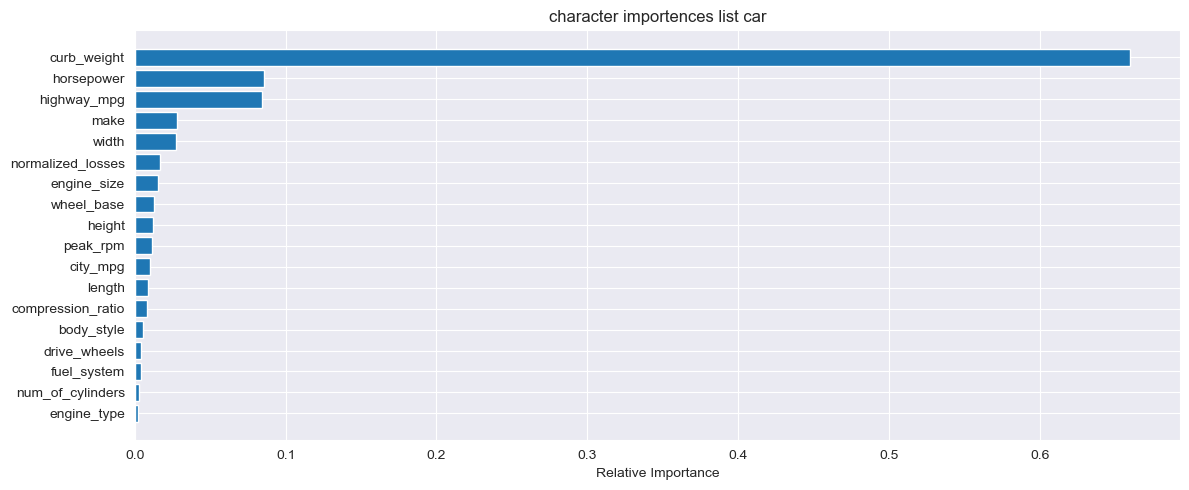

In [49]:

clf = RandomForestRegressor(n_estimators = 50, random_state = 123)
clf.fit(X, y)

fig, ax=plt.subplots(figsize=(12,5))
importances = clf.feature_importances_
indices =np.argsort(importances)
ax.set(title="character importences list car", xlabel="Relative Importance", ylabel=None)
plt.yticks(range(len(indices)),np.array(selected_features)[indices])
ax.barh(range(len(indices)), importances[indices])

<AxesSubplot:>

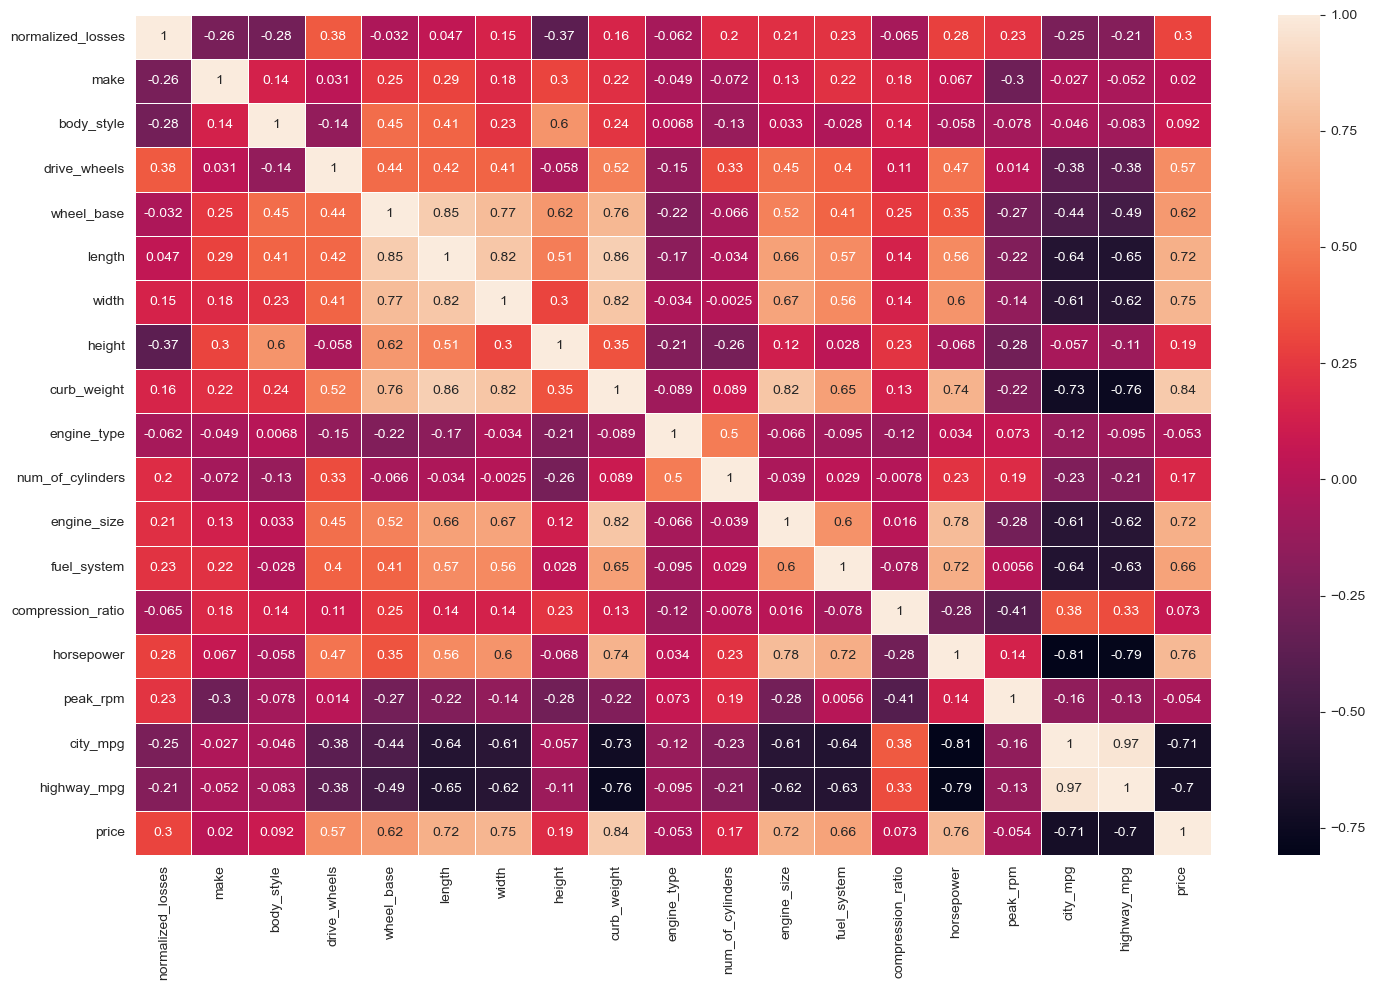

In [50]:

correlation = df_cleaned_data.corr(min_periods=3)
plt.figure(figsize=(15,10))
plt.rcParams["figure.autolayout"] = True
sns.heatmap(correlation, annot=True, linewidth=0.4)
